# Task 1

In [3]:
!pip install opencv-python # Download the OpenCV package for image processing.

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.2/38.6 MB 3.7 MB/s eta 0:00:11
    --------------------------------------- 0.6/38.6 MB 5.8 MB/s eta 0:00:07
   - -------------------------------------- 1.3/38.6 MB 9.0 MB/s eta 0:00:05
   -- ------------------------------------- 2.3/38.6 MB 12.2 MB/s eta 0:00:03
   --- ------------------------------------ 3.3/38.6 MB 14.1 MB/s eta 0:00:03
   ---- ----------------------------------- 4.4/38.6 MB 15.7 MB/s eta 0:00:03
   ----- ---------------------------------- 5.6/38.6 MB 16.3 MB/s eta 0:00:03
   ------- -------------------------------- 6.8/38.6 MB 18.2 MB/s eta 0:00:02
   -------- ------------------------------- 8.0/38.6 MB 18.3 MB/s eta 0:00:02
   -------

In [4]:
import numpy as np
import cv2

# Load the images
image_path1 = r"C:\Users\50328\OneDrive\Documents\CS 767\Assignments\Assign_1\Universe_1.webp"
image_path2 = r"C:\Users\50328\OneDrive\Documents\CS 767\Assignments\Assign_1\Universe_2.webp"
image1 = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)

# Calculate histograms
hist1, bins1 = np.histogram(image1.flatten(), 256, [0,256])
hist2, bins2 = np.histogram(image2.flatten(), 256, [0,256])

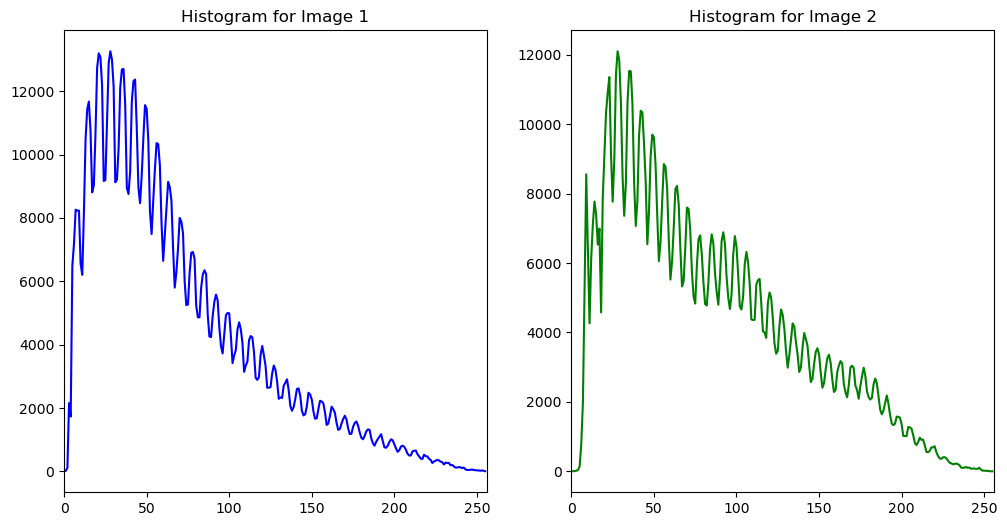

In [5]:
from matplotlib import pyplot as plt

# Plot histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(hist1, color='blue')
plt.title('Histogram for Image 1')
plt.xlim([0, 256])

plt.subplot(1, 2, 2)
plt.plot(hist2, color='green')
plt.title('Histogram for Image 2')
plt.xlim([0, 256])

plt.show()

# Normalize histograms for comparison
hist1_normalized = hist1 / hist1.sum()
hist2_normalized = hist2 / hist2.sum()

In [6]:
from scipy.stats import entropy
from scipy.spatial.distance import jensenshannon
from scipy.stats import ks_2samp

# Compute the Statistics
ks_statistic, ks_pvalue = ks_2samp(hist1_normalized, hist2_normalized)
cross_entropy = entropy(hist1_normalized, qk=hist2_normalized)
kl_divergence = entropy(hist1_normalized, qk=hist2_normalized)
js_divergence = jensenshannon(hist1_normalized, hist2_normalized, base=2)

ks_statistic, ks_pvalue, cross_entropy, kl_divergence, js_divergence

(0.140625, 0.012573067259953767, inf, inf, 0.14609043339890593)

# Task 2

In [7]:
import numpy as np

# 1. Create a random dataset in 3D space with three clusters
np.random.seed(123)
# Generate random data for three clusters
cluster_1 = np.random.normal(0, 1, (100, 3))
cluster_2 = np.random.normal(5, 1, (100, 3))
cluster_3 = np.random.normal(10, 1, (100, 3))

# Combine the clusters to form a dataset
X = np.vstack((cluster_1, cluster_2, cluster_3))

In [8]:
from sklearn.mixture import GaussianMixture

# 2. Implement Gaussian Mixture Modeling (GMM) clustering algorithm
gmm = GaussianMixture(n_components=3, random_state=0)

# Initial fit to visualize the starting point
gmm.fit(X)
initial_labels = gmm.predict(X)

C:\Users\50328\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


C:\Users\50328\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


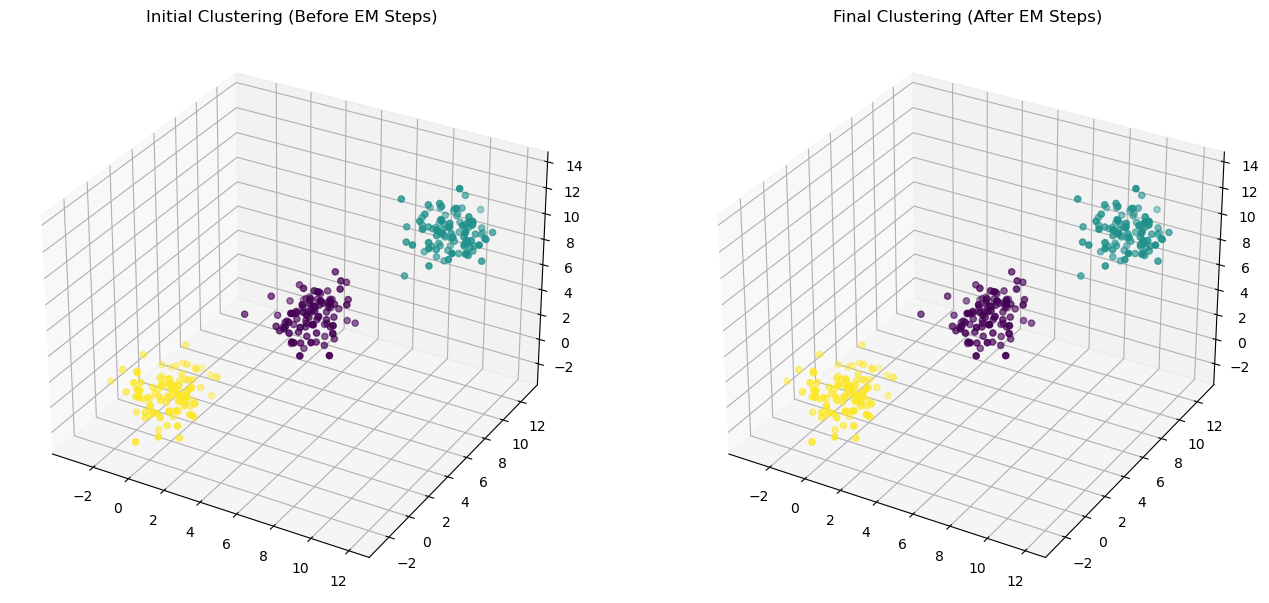

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Visualization of initial clustering (Initial guess - before EM steps)
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=initial_labels, cmap='viridis')
ax.set_title('Initial Clustering (Before EM Steps)')

# Perform EM algorithm to cluster the data
gmm.fit(X)
final_labels = gmm.predict(X)

# Visualization after EM steps
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X[:, 0], X[:, 1], X[:, 2], c=final_labels, cmap='viridis')
ax2.set_title('Final Clustering (After EM Steps)')

plt.show()